## 2 COUPLED reactions of different speeds, forming a "cascade":  
### `A <-> B` (fast) and `B <-> C` (slow)
Taken to equilibrium. Both reactions are mostly forward. All 1st order.  
**The concentration of the intermediate product B manifests 1 oscillation (transient "overshoot")**

Adaptive variable time resolution is used, with extensive diagnostics, 
and finally compared to a new run using fixed time intervals, with the same initial data.

In part2, some diagnostic insight is explored.  

In part3, two identical runs ("adaptive variable steps" vs. "fixed small steps") are compared. 

## Bathtub analogy:
A is initially full, while B and C are empty.  
Tubs are progressively lower (reactions are mostly forward.)  
A BIG pipe connects A and B: fast kinetics.  A small pipe connects B and C: slow kinetics. 

INTUITION: B, unable to quickly drain into C while at the same time being blasted by a hefty inflow from A,  
will experience a transient surge, in excess of its final equilibrium level.

* **[Compare with the final reaction plot (the orange line is B)](#cascade_1_plot)**

![2 Coupled Reactions](../../docs/2_coupled_reactions.png)

In [1]:
LAST_REVISED = "Oct. 11, 2024"
LIFE123_VERSION = "1.0.0.beta.39"   # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

import ipynbname

from life123 import check_version, ChemData, UniformCompartment, PlotlyHelper, GraphicLog

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the HTML logging (for the graphics)
log_file = ipynbname.name() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'cascade_1.log.htm'


# Initialize the System
Specify the chemicals and the reactions

In [6]:
# Specify the chemicals and the reactions; this data structure will get re-used in 
# the various simulations below
chem = ChemData()

# Reaction A <-> B (fast)
chem.add_reaction(reactants="A", products="B",
                       forward_rate=64., reverse_rate=8.) 

# Reaction B <-> C (slow)
chem.add_reaction(reactants="B", products="C",
                       forward_rate=12., reverse_rate=2.) 

print("Number of reactions: ", chem.number_of_reactions())

Number of reactions:  2


In [7]:
chem.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: A <-> B  (kF = 64 / kR = 8 / delta_G = -5,154.8 / K = 8) | 1st order in all reactants & products
1: B <-> C  (kF = 12 / kR = 2 / delta_G = -4,441.7 / K = 6) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'C', 'A', 'B'}


In [8]:
# Send a plot of the network of reactions to the HTML log file
chem.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `cascade_1.log.htm`]


## Run the simulation

In [9]:
dynamics = UniformCompartment(chem_data=chem, preset="fast")

dynamics.set_conc({"A": 50.}, snapshot=True) # Set the initial concentrations of all the chemicals, in their index order
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 50.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.0
Set of chemicals involved in reactions: {'C', 'A', 'B'}


In [10]:
dynamics.get_history()

SYSTEM TIME     A    B    C            caption
0          0.0  50.0  0.0  0.0  Initialized state

## Run the reaction

In [11]:
dynamics.enable_diagnostics()    # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(initial_step=0.02, duration=0.4,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  variable_steps=True)

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
48 total step(s) taken
Number of step re-do's because of negative concentrations: 1
Number of step re-do's because of elective soft aborts: 5
Norm usage: {'norm_A': 25, 'norm_B': 17, 'norm_C': 16, 'norm_D': 16}


### <a name="cascade_1_plot"> Plots of changes of concentration with time</a>
Notice the variable time steps (vertical dashed lines)

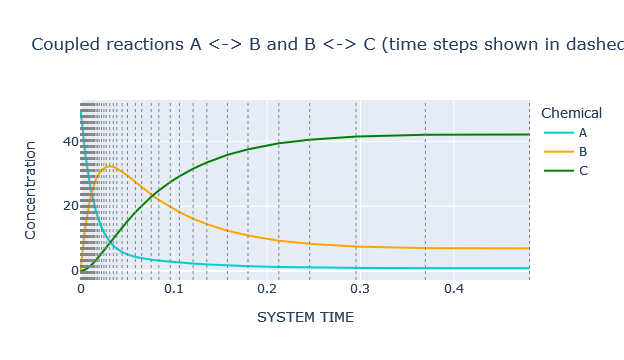

In [12]:
dynamics.plot_history(title="Coupled reactions A <-> B and B <-> C",
                      colors=['darkturquoise', 'orange', 'green'], show_intervals=True)

In [13]:
dynamics.curve_intersect("A", "B", t_start=0, t_end=0.05)

(0.011857732428358053, 24.047031609298816)

In [14]:
dynamics.curve_intersect("A", "C", t_start=0, t_end=0.05)

(0.031934885008449314, 8.852813807230596)

In [15]:
dynamics.curve_intersect("B", "C", t_start=0.05, t_end=0.1)

(0.07740303497735611, 23.285274847029168)

In [16]:
dynamics.get_history()

SYSTEM TIME          A          B          C             caption
0      0.000000  50.000000   0.000000   0.000000   Initialized state
1      0.000778  47.511680   2.488320   0.000000   1st reaction step
2      0.001400  45.632475   4.348950   0.018575                    
3      0.002022  43.837347   6.111636   0.051017                    
4      0.002519  42.465438   7.447097   0.087465                    
5      0.003017  41.142542   8.725606   0.131851                    
6      0.003515  39.866871   9.949300   0.183829                    
7      0.004012  38.636703  11.120234   0.243063                    
8      0.004510  37.450378  12.240391   0.309231                    
9      0.005008  36.306298  13.311680   0.382022                    
10     0.005505  35.202922  14.335939   0.461139                    
11     0.006003  34.138767  15.314939   0.546294                    
12     0.006501  33.112404  16.250386   0.637210                    
13     0.006998  32.122455  17.143922   0.733623                    
14     0.007496  31.167595  17.997130   0.835276                    
15     0.008243  29.786018  19.218736   0.995246                    
16     0.008989  28.477742  20.356337   1.165921                    
17     0.009736  27.238764  21.414705   1.346531                    
18     0.010482  26.065300  22.398347   1.536353                    
19     0.011602  24.398010  23.768113   1.833877                    
20     0.012722  22.862474  24.988386   2.149140                    
21     0.013841  21.447911  26.071994   2.480095                    
22     0.014961  20.144428  27.030704   2.824868                    
23     0.016641  18.342204  28.297603   3.360193                    
24     0.018320  16.750734  29.330012   3.919255                    
25     0.020000  15.344212  30.158542   4.497247                    
26     0.022519  13.477920  31.135708   5.386372                    
27     0.025039  11.932250  31.767190   6.300559                    
28     0.027558  10.648537  32.122231   7.229232                    
29     0.031337   9.044186  32.324491   8.631323                    
30     0.035116   7.833986  32.134026  10.031989                    
31     0.038896   6.910732  31.675838  11.413430                    
32     0.044564   5.840026  30.721211  13.438763                    
33     0.050233   5.114478  29.509327  15.376196                    
34     0.058736   4.338557  27.535703  18.125740                    
35     0.065538   3.948219  25.924919  20.126862                    
36     0.075742   3.486129  23.623393  22.890478                    
37     0.083905   3.207568  21.961627  24.830805                    
38     0.096149   2.845240  19.705148  27.449612                    
39     0.105945   2.605699  18.166190  29.228112                    
40     0.120638   2.290745  16.137006  31.572249                    
41     0.135332   2.033442  14.476842  33.489716                    
42     0.157371   1.717708  12.439976  35.842316                    
43     0.179411   1.488195  10.959299  37.552505                    
44     0.212471   1.237929   9.344771  39.417300                    
45     0.245531   1.090175   8.391543  40.518282                    
46     0.295121   0.959315   7.547371  41.493315                    
47     0.369506   0.883653   7.059061  42.057286                    
48     0.481083   0.874584   7.001835  42.123581  last reaction step

In [17]:
dynamics.diagnostics.explain_time_advance()

From time 0 to 0.0007776, in 1 step of 0.000778
From time 0.0007776 to 0.002022, in 2 steps of 0.000622
From time 0.002022 to 0.007496, in 11 steps of 0.000498
From time 0.007496 to 0.01048, in 4 steps of 0.000746
From time 0.01048 to 0.01496, in 4 steps of 0.00112
From time 0.01496 to 0.02, in 3 steps of 0.00168
From time 0.02 to 0.02756, in 3 steps of 0.00252
From time 0.02756 to 0.0389, in 3 steps of 0.00378
From time 0.0389 to 0.05023, in 2 steps of 0.00567
From time 0.05023 to 0.05874, in 1 step of 0.0085
From time 0.05874 to 0.06554, in 1 step of 0.0068
From time 0.06554 to 0.07574, in 1 step of 0.0102
From time 0.07574 to 0.08391, in 1 step of 0.00816
From time 0.08391 to 0.09615, in 1 step of 0.0122
From time 0.09615 to 0.1059, in 1 step of 0.0098
From time 0.1059 to 0.1353, in 2 steps of 0.0147
From time 0.1353 to 0.1794, in 2 steps of 0.022
From time 0.1794 to 0.2455, in 2 steps of 0.0331
From time 0.2455 to 0.2951, in 1 step of 0.0496
From time 0.2951 to 0.3695, in 1 step of

### Check the final equilibrium

In [18]:
# Verify that all the reactions have reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 0.8746 ; [B] = 7.002
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 8.0059
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 8
Discrepancy between the two values: 0.07378 %
Reaction IS in equilibrium (within 1% tolerance)

1: B <-> C
Final concentrations: [B] = 7.002 ; [C] = 42.12
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 6.01608
    Formula used:  [C] / [B]
2. Ratio of forward/reverse reaction rates: 6
Discrepancy between the two values: 0.268 %
Reaction IS in equilibrium (within 1% tolerance)



True

### Let's look at the final concentrations of `A` and `C` (i.e., the reactant and product of the composite reaction)

In [19]:
A_final = dynamics.get_chem_conc("A")
A_final

0.8745841244150234

In [20]:
C_final = dynamics.get_chem_conc("C")
C_final

42.123581082850514

#### Their ratio:

In [21]:
C_final / A_final

48.16412727709344

### As expected the equilibrium constant for the overall reaction `A <-> C` (approx. 48) is indeed the product of the equilibrium constants of the two elementary reactions (K = 8 and K = 6, respectively) that we saw earlier.

# PART 2 - DIAGNOSTIC INSIGHT

Perform some verification

### Take a peek at the diagnostic data saved during the earlier reaction simulation

In [22]:
# Concentration increments due to reaction 0 (A <-> B)
# Note that [C] is not affected
dynamics.diagnostics.get_rxn_data(rxn_index=0)

Reaction:  A <-> B


START_TIME  time_step aborted    Delta A    Delta B  \
0     0.000000   0.020000    True        NaN        NaN   
1     0.000000   0.010000    True -32.000000  32.000000   
2     0.000000   0.006000    True -19.200000  19.200000   
3     0.000000   0.003600    True -11.520000  11.520000   
4     0.000000   0.002160    True  -6.912000   6.912000   
5     0.000000   0.001296    True  -4.147200   4.147200   
6     0.000000   0.000778   False  -2.488320   2.488320   
7     0.000778   0.000622   False  -1.879205   1.879205   
8     0.001400   0.000622   False  -1.795128   1.795128   
9     0.002022   0.000498   False  -1.371909   1.371909   
10    0.002519   0.000498   False  -1.322896   1.322896   
11    0.003017   0.000498   False  -1.275671   1.275671   
12    0.003515   0.000498   False  -1.230168   1.230168   
13    0.004012   0.000498   False  -1.186325   1.186325   
14    0.004510   0.000498   False  -1.144080   1.144080   
15    0.005008   0.000498   False  -1.103376   1.103376   
16    0.005505   0.000498   False  -1.064155   1.064155   
17    0.006003   0.000498   False  -1.026363   1.026363   
18    0.006501   0.000498   False  -0.989949   0.989949   
19    0.006998   0.000498   False  -0.954861   0.954861   
20    0.007496   0.000746   False  -1.381577   1.381577   
21    0.008243   0.000746   False  -1.308275   1.308275   
22    0.008989   0.000746   False  -1.238978   1.238978   
23    0.009736   0.000746   False  -1.173464   1.173464   
24    0.010482   0.001120   False  -1.667290   1.667290   
25    0.011602   0.001120   False  -1.535536   1.535536   
26    0.012722   0.001120   False  -1.414563   1.414563   
27    0.013841   0.001120   False  -1.303483   1.303483   
28    0.014961   0.001680   False  -1.802224   1.802224   
29    0.016641   0.001680   False  -1.591470   1.591470   
30    0.018320   0.001680   False  -1.406522   1.406522   
31    0.020000   0.002519   False  -1.866292   1.866292   
32    0.022519   0.002519   False  -1.545670   1.545670   
33    0.025039   0.002519   False  -1.283713   1.283713   
34    0.027558   0.003779   False  -1.604351   1.604351   
35    0.031337   0.003779   False  -1.210200   1.210200   
36    0.035116   0.003779   False  -0.923254   0.923254   
37    0.038896   0.005669   False  -1.070706   1.070706   
38    0.044564   0.005669   False  -0.725549   0.725549   
39    0.050233   0.008503   False  -0.775920   0.775920   
40    0.058736   0.006802   False  -0.390338   0.390338   
41    0.065538   0.010204   False  -0.462090   0.462090   
42    0.075742   0.008163   False  -0.278561   0.278561   
43    0.083905   0.012244   False  -0.362328   0.362328   
44    0.096149   0.009796   False  -0.239541   0.239541   
45    0.105945   0.014693   False  -0.314953   0.314953   
46    0.120638   0.014693   False  -0.257304   0.257304   
47    0.135332   0.022040   False  -0.315733   0.315733   
48    0.157371   0.022040   False  -0.229513   0.229513   
49    0.179411   0.033060   False  -0.250266   0.250266   
50    0.212471   0.033060   False  -0.147754   0.147754   
51    0.245531   0.049590   False  -0.130860   0.130860   
52    0.295121   0.074385   False  -0.075662   0.075662   
53    0.369506   0.111577   False  -0.009068   0.009068   

                             caption         rate  
0         aborted: neg. conc. in `A`          NaN  
1   aborted: excessive norm value(s)  3200.000000  
2   aborted: excessive norm value(s)  3200.000000  
3   aborted: excessive norm value(s)  3200.000000  
4   aborted: excessive norm value(s)  3200.000000  
5   aborted: excessive norm value(s)  3200.000000  
6                                     3200.000000  
7                                     3020.840960  
8                                     2885.686820  
9                                     2756.697133  
10                                    2658.211272  
11                                    2563.317851  
12                                    2471.885360  
13                            

In [23]:
# Concentration increments due to reaction 1 (B <-> C) 
# Also notice that the 0-th row from the A <-> B reaction isn't seen here (start time 0 and step 0.02), 
# because that step was aborted early on, BEFORE even getting to THIS reaction
dynamics.diagnostics.get_rxn_data(rxn_index=1)

Reaction:  B <-> C


START_TIME  time_step aborted   Delta B   Delta C        rate  \
0     0.000000   0.010000    True  0.000000  0.000000    0.000000   
1     0.000000   0.006000    True  0.000000  0.000000    0.000000   
2     0.000000   0.003600    True  0.000000  0.000000    0.000000   
3     0.000000   0.002160    True  0.000000  0.000000    0.000000   
4     0.000000   0.001296    True  0.000000  0.000000    0.000000   
5     0.000000   0.000778   False  0.000000  0.000000    0.000000   
6     0.000778   0.000622   False -0.018575  0.018575   29.859840   
7     0.001400   0.000622   False -0.032442  0.032442   52.150244   
8     0.002022   0.000498   False -0.036448  0.036448   73.237598   
9     0.002519   0.000498   False -0.044387  0.044387   89.190237   
10    0.003017   0.000498   False -0.051978  0.051978  104.443575   
11    0.003515   0.000498   False -0.059234  0.059234  119.023938   
12    0.004012   0.000498   False -0.066168  0.066168  132.956683   
13    0.004510   0.000498   False -0.072791  0.072791  146.266235   
14    0.005008   0.000498   False -0.079117  0.079117  158.976118   
15    0.005505   0.000498   False -0.085155  0.085155  171.108992   
16    0.006003   0.000498   False -0.090917  0.090917  182.686681   
17    0.006501   0.000498   False -0.096413  0.096413  193.730206   
18    0.006998   0.000498   False -0.101653  0.101653  204.259814   
19    0.007496   0.000746   False -0.159970  0.159970  214.295006   
20    0.008243   0.000746   False -0.170675  0.170675  228.634342   
21    0.008989   0.000746   False -0.180610  0.180610  241.944203   
22    0.009736   0.000746   False -0.189822  0.189822  254.283393   
23    0.010482   0.001120   False -0.297524  0.297524  265.707463   
24    0.011602   0.001120   False -0.315263  0.315263  281.549606   
25    0.012722   0.001120   False -0.330954  0.330954  295.562349   
26    0.013841   0.001120   False -0.344773  0.344773  307.903744   
27    0.014961   0.001680   False -0.535325  0.535325  318.718715   
28    0.016641   0.001680   False -0.559062  0.559062  332.850855   
29    0.018320   0.001680   False -0.577992  0.577992  344.121633   
30    0.020000   0.002519   False -0.889125  0.889125  352.908006   
31    0.022519   0.002519   False -0.914188  0.914188  362.855756   
32    0.025039   0.002519   False -0.928673  0.928673  368.605168   
33    0.027558   0.003779   False -1.402091  1.402091  371.008309   
34    0.031337   0.003779   False -1.400666  1.400666  370.631249   
35    0.035116   0.003779   False -1.381442  1.381442  365.544329   
36    0.038896   0.005669   False -2.025333  2.025333  357.283191   
37    0.044564   0.005669   False -1.937433  1.937433  341.777002   
38    0.050233   0.008503   False -2.749544  2.749544  323.359530   
39    0.058736   0.006802   False -2.001123  2.001123  294.176957   
40    0.065538   0.010204   False -2.763615  2.763615  270.845299   
41    0.075742   0.008163   False -1.940327  1.940327  237.699766   
42    0.083905   0.012244   False -2.618807  2.618807  213.877913   
43    0.096149   0.009796   False -1.778500  1.778500  181.562555   
44    0.105945   0.014693   False -2.344137  2.344137  159.538054   
45    0.120638   0.014693   False -1.917467  1.917467  130.499569   
46    0.135332   0.022040   False -2.352600  2.352600  106.742678   
47    0.157371   0.022040   False -1.710189  1.710189   77.595076   
48    0.179411   0.033060   False -1.864795  1.864795   56.406583   
49    0.212471   0.033060   False -1.100982  1.100982   33.302648   
50    0.245531   0.049590   False -0.975033  0.975033   19.661952   
51    0.295121   0.074385   False -0.563972  0.563972    7.581818   
52    0.369506   0.111577   False -0.066295  0.066295    0.594162   

                             caption  
0   aborted: excessive norm value(s)  
1   aborted: excessive norm value(s)  
2   aborted: excessive norm value(s)  
3   aborted: excessive norm value(s)  
4   aborted: excessive norm value(s)  
5                                     
6   

# PART 3 : Re-run with very small constant steps, and compare with original run

We'll use **constant steps of size 0.0005** , which is 1/4 of the smallest steps (the "substep" size) previously used in the variable-step run

In [24]:
dynamics2 = UniformCompartment(chem_data=chem)  # Re-use the same chemicals and reactions of the previous simulation

In [25]:
dynamics2.set_conc({"A": 50.}, snapshot=True)

In [26]:
# Notice that we're using FIXED steps this time
dynamics2.single_compartment_react(initial_step=0.0005, duration=0.4,
                                   variable_steps=False,
                                   snapshots={"initial_caption": "1st reaction step",
                                              "final_caption": "last reaction step"},
                                   )

800 total step(s) taken


plot_pandas() NOTICE: Excessive number of vertical lines (801) - only showing 1 every 6 lines


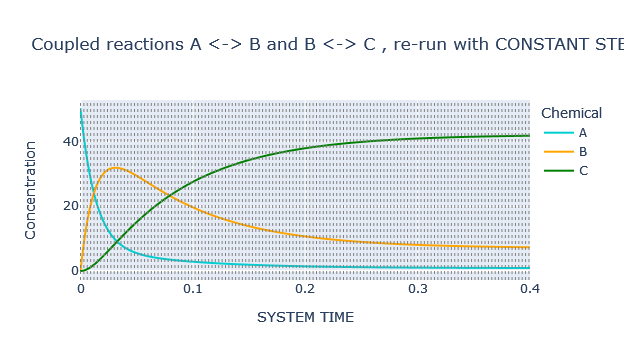

In [27]:
dynamics2.plot_history(title="Coupled reactions A <-> B and B <-> C , re-run with CONSTANT STEPS",
                       colors=['darkturquoise', 'orange', 'green'], show_intervals=True)

_(Notice that the vertical steps are now equally spaced - and that there are so many of them that we're only showing 1 every 6)_

In [28]:
dynamics2.curve_intersect(t_start=0, t_end=0.05, chem1="A", chem2="B")

(0.011934802021672202, 24.03028826511689)

In [29]:
dynamics2.curve_intersect(t_start=0, t_end=0.05, chem1="A", chem2="C")

(0.03259520587890533, 9.081194286771336)

In [30]:
dynamics2.curve_intersect(t_start=0.05, t_end=0.1, chem1="B", chem2="C")

(0.07932921476313338, 23.238745930657448)

In [31]:
df2 = dynamics2.get_history()
df2

SYSTEM TIME          A         B          C             caption
0         0.0000  50.000000  0.000000   0.000000   Initialized state
1         0.0005  48.400000  1.600000   0.000000   1st reaction step
2         0.0010  46.857600  3.132800   0.009600                    
3         0.0015  45.370688  4.600925   0.028387                    
4         0.0020  43.937230  6.006806   0.055964                    
..           ...        ...       ...        ...                 ...
796       0.3980   0.925494  7.329151  41.745354                    
797       0.3985   0.925195  7.327221  41.747584                    
798       0.3990   0.924898  7.325303  41.749800                    
799       0.3995   0.924602  7.323396  41.752002                    
800       0.4000   0.924309  7.321501  41.754190  last reaction step

[801 rows x 5 columns]

## Notice that we now did 800 steps - vs. the 48 of the earlier variable-resolution run!

## Let's compare some entries with the coarser previous variable-time run

#### Let's compare the plots of [B] from the earlier (variable-step) run, and the latest (high-precision, fixed-step) one:

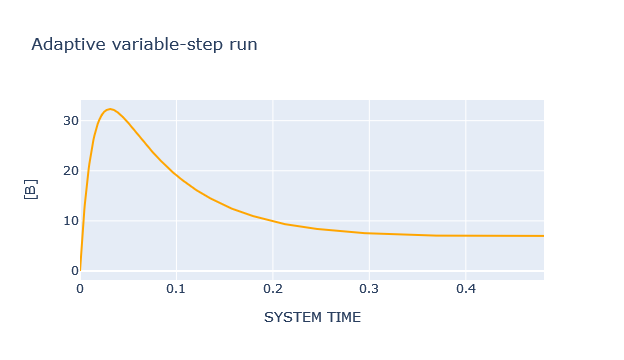

In [32]:
# Earlier run (using variable time steps)
fig1 = dynamics.plot_history(chemicals='B', colors='orange', title="Adaptive variable-step run", 
                             show=True)

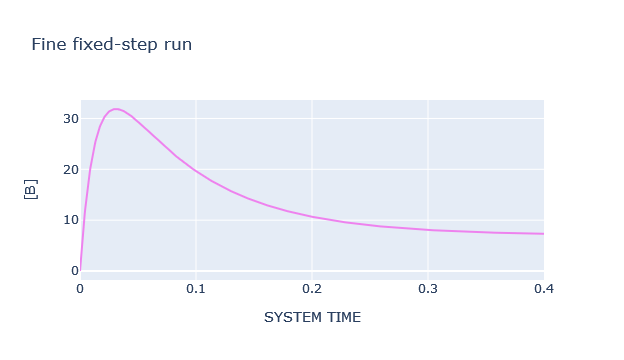

In [33]:
# Latest run (high-precision result from fine fixed-resolution run)
fig2 = dynamics2.plot_history(chemicals='B', colors=['violet'], title="Fine fixed-step run", 
                              show=True)

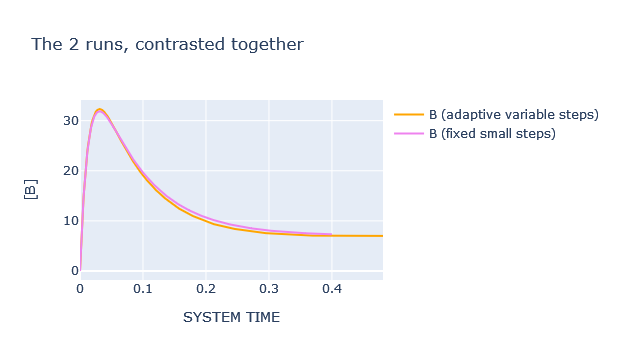

In [34]:
PlotlyHelper.combine_plots(fig_list=[fig1, fig2], title="The 2 runs, contrasted together", 
                           curve_labels=["B (adaptive variable steps)", "B (fixed small steps)"])

#### They overlap fairly well!  The 800 fixed-timestep points vs. the 48 adaptable variable-timestep ones.
The adaptive algorithms avoided 752 extra steps of limited benefit...